### MIE370 Project 4 --- Text Classification using BERT
**Deadline: Nov 22nd, 9PM [The deadline is firm and will be enforced strictly. Plan ahead and submit hours before the deadline to avoid the risk of lateness penalty.]**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the MIE370 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on projects or assessments will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:

Full Name: Devraj Solanki

Student ID: 1009065707

UTorID: solank58

**Three submission files are required:**

For submitting this project, three files must be submitted on Quercus by the project deadline:

1) The complete Jupyter file (in .ipynb format) (that completely compiles on Google colab without any errors regardless of the computer used.)

2) A self-contained and complete HTML printout of the same Jupyter file with all the output printed as well as all the code, text cells, comments, and figures.

3) Appendix pdf file of all prompts and all responses for all interactions you have had regarding this project with any AI assistant tool (Chat GPT etc.). If you do not use any AI assistant tool at all, this appendix pdf file is not needed.

**Policy regarding the use of AI assistant tools**

If you use a generative AI tool (e.g., ChatGPT, GitHub Copilot, or any other similar tool) to get ideas and/or partial answers for projects or assignments or to generate any code and/or text, you must declare in your submission the tools that you have used and describe the usage, and include in your submission an appendix that captures all the interactions (prompts and responses).

You will not be penalized for the declared use of such AI assistant tools, and the grading decisions will be based on your original contributions as well as the efforts that you make to check and/or correct the answers provided by the tool. Students are ultimately accountable for the work they submit. Failure to fully declare the use of this tool will be considered "unauthorized assistance" and will have consequences (See B.I. of the [U of T CODE OF BEHAVIOUR ON ACADEMIC MATTERS](https://governingcouncil.utoronto.ca/secretariat/policies/code-behaviour-academic-matters-july-1-2019))

##**Marking Scheme:**

This project is worth **9 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to obtain an **HTML** file from an **IPYNB** file

1. Download the IPYNB file of your complete project: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of a new Colab session

3. Select & upload your `.ipynb` file you just downloaded, and then copy its path (right click) (you might need to hit the Refresh button before your file shows up)


4. Replace XXXX with the copied path and then execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html XXXX
```

5. An HTML version of your notebook will appear in the Colab session files and you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus (before the deadline) for grading.



More info on coverting IPYNB to HTML: https://stackoverflow.com/a/64487858



<font color='orange'>**Important Notes on Using T4 GPU:**</font>


1. **Google Colab T4 Runtime Access:**

  Each Google account has a limited amount of free T4 GPU runtime access. If you run out of free T4 runtime:
     - You can create another Google account and use its free T4 access.
     - You can run the code on your own laptop if it has a GPU that supports CUDA.
     - You are not required to pay for additional T4 access. If you choose to do so, it is at your discretion.
   
2. **Suggestions:**
    - Limit the dataset to the first 1,370 messages (instead of "50,000" mentioned in the Part 2), and complete all parts using Google Colab CPU. Once you are done with the project, change back the limit to 50,000 and run the entire notebook using Google Colab T4 GPU for the final submission and discussions.
    - Remember to **Start Early**, so that you have enough time to run the code using Google Colab T4 GPU at different days if you need to.


# Project 4 [80 Marks]

The goal of this project is to explore text classification using BERT. We will be using the [Emotions Dataset of Twitter Messages](https://www.kaggle.com/datasets/nelgiriyewithana/emotions) for this task. This project is divided into multiple steps, each designed to help you understand and implement different aspects of BERT for text classification.


 ## Part 1: Setup

### Part 1.1: Import the Necessary Libraries


We will be using PyTorch for the deep learning functionality, the transformers library for BERT, the scikit-learn library to evaluate the model, and pandas and numpy to handle data.

In [ ]:
!pip install wget

In [ ]:
!pip install transformers

In [ ]:
import wget
import gzip, shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

 ### Part 1.2: Use Colab GPU for Training

Since we will be training a large neural network, it's best to take advantage of the GPU offered by Google Colab, otherwise training will take a very long time.
A GPU can be added by selecting the "Runtime" tab and change runtime type to "T4 GPU".

In order for torch to use the GPU, we need to identify and specify the GPU as the device. Later, in our training loop, we will load data onto the device.

In [ ]:
# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


 ## Part 2: Loading the Emotions Dataset and Preprocessing it [20 Marks]

  The given code downloads the csv file containing Twitter messages and their corresponding emotions.

* Read the CSV file as a Pandas DataFrame setting `index_col=0` and call it `df`, report the number of messages in the dataset, and display 10 random rows from the DataFrame **[4 Marks]**


* Limit the dataset to the first 50'000 messages, check for missing values and duplicated rows, then remove rows that contain missing values and also remove the duplicated messages, and then report the number of remaining messages in the DataFrame **[5 Marks]**


* Extract unique labels from the 'label' column of the DataFrame, create a dictionary to map string labels to numerical labels (using the six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)), then modify the column 'label' in the DataFrame by replacing string labels with numerical labels **[8 Marks]**


* Visualize class distributions in a plot where the x-axis is the six categories of emotions and the y-axis is the class frequencies. Which one did you find has the highest frequency which one has the lowest? **[3 Marks]**

In [ ]:
# Download the dataset
wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/main/Emotions.csv')

'Emotions (2).csv'

In [ ]:
# Add your code HERE
# Referenced tutorial 11 for part 2 code

# 1.

# Load the dataset into a pandas dataframe
df = pd.read_csv("Emotions.csv", index_col = 0)

# Report the number of messages
print(f'Number of messages: {df.shape[0]}')

# Display 10 random rows from the data.
df.sample(10)



Number of messages: 416809


,text,label
36130,id say maybe made them feel foolish but that w...,sadness
138065,i joined the lds church i admit to feeling som...,sadness
146440,i must admit i didnt feel like hugging him not...,anger
103337,i hate that i can still feel if any nerve is d...,sadness
315528,im actually feeling a little smug,joy
414303,i left without a real explanation or a goodbye...,love
407867,i almost always get their soup of the day for ...,joy
291389,i feel respected for what i m doing,joy
227948,i have a really nice feeling about this one an...,surprise
176638,i felt absolutely and totally violated as thou...,sadness


In [ ]:
#2.

# limiting data to first 50,000 messages
df = df.loc[0:50000,:] ### CHANGE THIS LATER

# , check for missing values and duplicated rows, then remove rows that contain missing values and
# also remove the duplicated messages, and then report the number of remaining messages in the DataFrame

# checking for missing values
print(df.isnull().values.any())

# checking for duplicated rows
print(df.duplicated().values.any())

  # removing duplicated rows
df.drop_duplicates(inplace =True)

# reporting remaining number of messages in df
print(f"Number of messages: {df.shape[0]}")


False
True
Number of messages: 49987


In [ ]:
#3.

# getting unique labels
print(df['label'].unique())

# creating dictionary to map strings to numeric labels
emotions = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
numerics = [0,1,2,3,4,5]
emotion_dict = dict(zip(emotions,numerics))

# modifying label column
df.replace({"label": emotion_dict}, inplace = True)


['fear' 'sadness' 'love' 'joy' 'surprise' 'anger']


<ipython-input-36-fc2cb9717c5f>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"label": emotion_dict}, inplace = True)


class with highest frequency: joy
class with lowest frequency: surprise


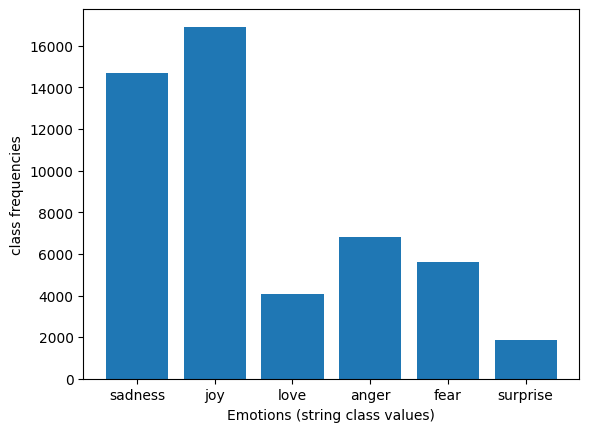

In [ ]:
#4.

# Which one did you find has the highest frequency which one has the lowest? [3 Marks]

# emotions list
emotions = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

# getting class counts
counts = df['label'].value_counts().sort_index()

# visualizing class distribution
plt.bar(emotions,counts)
plt.xlabel("Emotions (string class values)")
plt.ylabel("class frequencies")

print(f"class with highest frequency: {emotions[counts.idxmax()]}")
print(f"class with lowest frequency: {emotions[counts.idxmin()]}")


 ## Part 3: Preparing Text Data for BERT [25 Marks]

To feed our text to BERT, we need to break down the strings into subgroups called **tokens** and then these tokens must be mapped to their index in the tokenizer vocabulary.
First, we are going to consider two types of tokenization approaches of **character** and **word** tokenization. Then, we will use the BERT tokenizer on the dataset.

Click [here](https://medium.com/@shaikhrayyan123/a-comprehensive-guide-to-understanding-bert-from-beginners-to-advanced-2379699e2b51) to find out more about BERT!

 ### Part 3.1: Character and Word tokenization [10 Marks]

* Consider the first Twitter message in the dataset, and use Python's inbuilt `list()` class to split text into characters and create the character tokenized list, then report the number of tokens **[1 Mark]**


* Create a dictionary to map each character in the vocabulary to a unique integer, then report the length of the dictionary **[2 Marks]**


* Represent the first Twitter message in numerical format using the dictionary created earlier. Convert it to a 2D torch tensor of one-hot vectors (hint: use `torch.nn.functional.one_hot` for one-hot encoding), and report the shape of the one-hot vector representing the message **[3 Marks]**


* Now, consider the first Twitter message again and use Python's inbuilt `split()` function to create the word tokenized list, and report the number of tokens in this case **[2 marks]**


* What are the drawbacks of Character and Word Tokenization? **[2 Marks]**



In [ ]:
# Add your code HERE
#1.

# splitting first message into characters
first_m = list(df['text'][0])
print(f"number of tokens: {len(first_m)}")

number of tokens: 45


In [ ]:
#2.
# creating a dictionary that maps unique characters to unique integers
first_m_unique = set(first_m)
char_dict = {char:num for num,char in enumerate(first_m_unique)}
print(f"Length of dictionary is: {len(char_dict)}")

Length of dictionary is: 17


In [ ]:
#3.

# representing first twitter message as a 2d tensor of one-hot vectors

first_m_num = [char_dict[key] for key in first_m]
first_m_tensor = torch.tensor(first_m_num)
first_m_one_hot = F.one_hot(first_m_tensor)

print(f"shape of one-hot vector: {first_m_one_hot.shape}")

shape of one-hot vector: torch.Size([45, 17])


In [ ]:
# 4.
# performing word tokenization

first_m_wt = df['text'][0].split()
print(f"number of tokens: {len(first_m_wt)}")

number of tokens: 8


What are the drawbacks of Character and Word Tokenization?

**ANS**

 In Character tokenization, you lose the semantics/meaning being conveyed in a sentence since you are training on each character of a word rather than the words themselves.  

In Word tokenization, you keep the semantics/meaning conveyed in a sentence since you are now training on each word rather than each character, however this requires a larger vocabulary to store each unique word, meaning its more computationaly costly due to more model parameters to train. There is also a chance that a model may encounter out-of-vocabulary (OOV) words during testing that it hasn't encountered during training, making it difficult for the model to process certain phrases/setences with OOV words.



### Part 3.2: BERT Tokenizer [15 Marks]

Subword tokenization is to combine the best aspects of character and word tokenization by learning from a pretraining corpus. BERT utilizes the subword tokenization algorithm [‘WordPiece’](https://towardsdatascience.com/wordpiece-subword-based-tokenization-algorithm-1fbd14394ed7) developed by the Google Research team.
The below cell will download the BERT tokenizer for us. We will be using the "[uncased](https://huggingface.co/google-bert/bert-base-uncased)" version.


* Once the tokenizer is loaded, report the size of the base vocabulary (i.e. `vocab_size`), the maximum length for the inputs of the model (i.e. `model_max_length`), and a list of expected model inputs (i.e. `model_input_names`) (hint: you may find this [link](https://huggingface.co/transformers/v4.2.2/main_classes/tokenizer.html) informative) **[2 marks]**

* Find the maximum sentence length of the dataset, by splitting every sentence in the dataset into tokens using `tokenizer.tokenize()` and finding the maximum length of this list plus 2 (for the `[CLS]` and `[SEP]` tokens) **[3 marks]**
  

* Now, use the `.encode` function of the tokenizer (i.e. `tokenizer.encode()`) ([more info](https://huggingface.co/docs/tokenizers/en/api/tokenizer#tokenizers.Tokenizer.encode)) to apply the following multiple steps for every sentence in the dataset:

  1. Tokenize the sentence
  2. Prepend the `[CLS]` token to the start
  3. Append the `[SEP]` token to the end
  4. Map tokens to their IDs
  5. Pad and truncate the sentence to `MAX_LEN`
  6. Add the encoded sentence to a list called `input_ids`
  
  **Note:** `MAX_LEN` is the next highest power-of-2 for the maximum sentence length in our dataset including the `[CLS]` and `[SEP]` tokens. For example, if the maximum sentence length of the dataset (from the previous step) is 47, we will choose `MAX_LEN` to be 64 (i.e. 2$^6$).

  **Note:** Padding and truncation are preprocessing techniques used in transformers to ensure that all input sequences have the same length. Padding refers to the process of adding extra tokens (usually a special token such as [PAD]) to the end of short sequences so that they all have the same length.
  
  **Hint:** Applying these steps for a single sentence should look like the code below:

  ```
  tokenizer.encode(YOUR SENTENCE, add_special_tokens = True, truncation = True, max_length = TO_BE_ADDED, padding = 'max_length')
  ```

  **[7 marks]**

* Now, we need to create an attention mask which is a binary mask that designates which tokens should be attended to (assigned non-zero weights) and which should be ignored (assigned zero weights). For this purpose you will be using the `input_ids` to create the list `attention_masks` which contains the attention masks for all sentences in the dataset. In other words, for every sequence in the `input_ids`, create a mask of 1 for all input tokens and 0 for all padding tokens and include them in the list called `attention_masks` **[2 marks]**

* Print the 300th Twitter message in the dataset and its corresponding token ids and attention masks **[1 mark]**

  

This is what the mask is doing ([source](https://medium.com/@shaikhrayyan123/a-comprehensive-guide-to-understanding-bert-from-beginners-to-advanced-2379699e2b51))

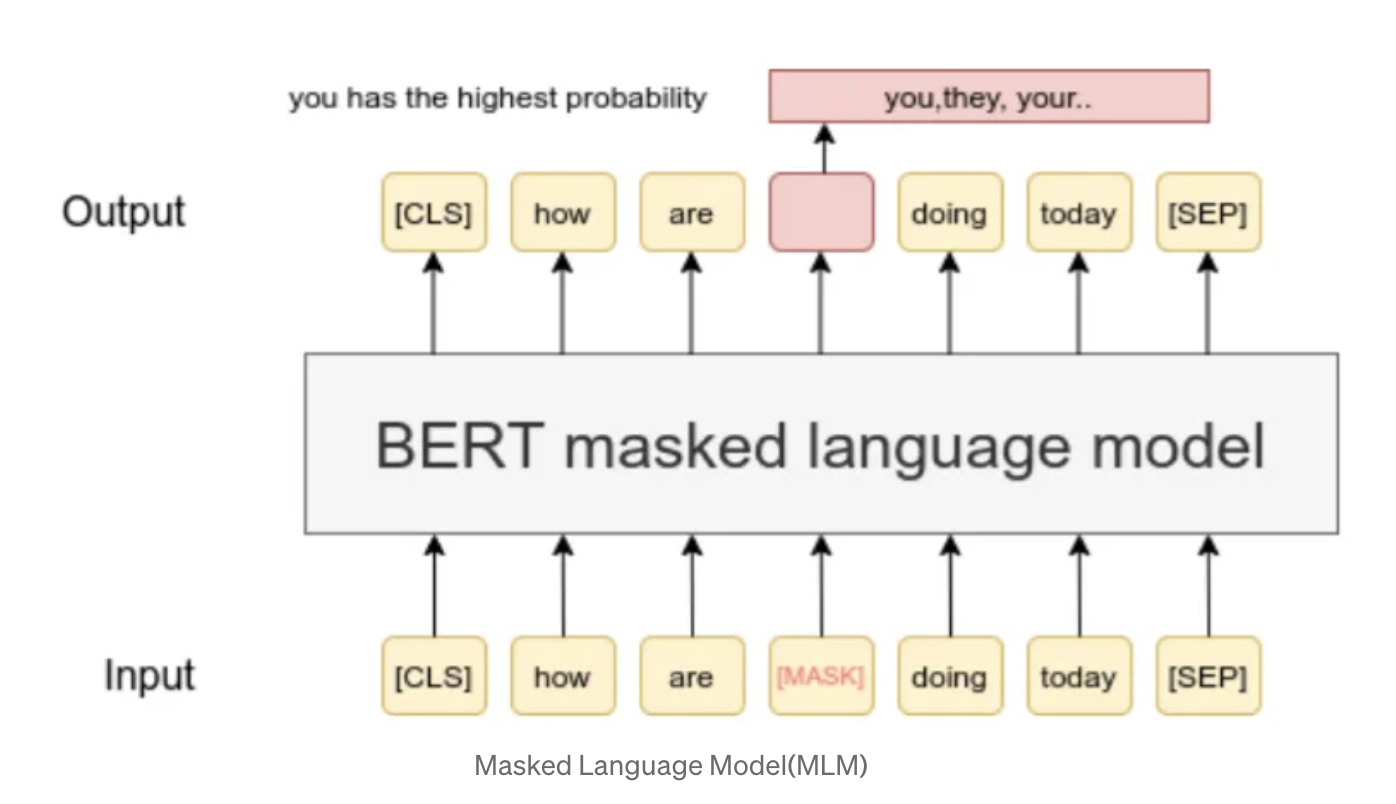

In [ ]:
# Subword tokenization
from transformers import BertTokenizer
# Load the BERT tokenizer
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
# Add your code HERE

#1.

print(f"size of base vocabulary: {tokenizer.vocab_size}")
print(f"max input length: {tokenizer.model_max_length}")
print(f"expected model inputs: {tokenizer.model_input_names}")

size of base vocabulary: 30522
max input length: 512
expected model inputs: ['input_ids', 'token_type_ids', 'attention_mask']


In [ ]:
#2.
sentences = [tokenizer.tokenize(sentence) for sentence in df['text']]
max_sentence_len = max([len(sentence) for sentence in sentences])+2
print(f"maximum sentence length in dataset: {max_sentence_len} ")

maximum sentence length in dataset: 107 


In [ ]:
#3.
input_ids = []
for sentence in df['text']:
  encoded_sentence= tokenizer.encode(sentence, add_special_tokens = True, truncation = True, max_length = max_sentence_len, padding = 'max_length')
  input_ids.append(encoded_sentence)

In [ ]:
#4.
# masking padding tokens

attention_masks = []
for sequence in input_ids:
  attention_masks.append([int(bool(token)) for token in sequence])

In [ ]:
# 5.

# printing 300th twitter message, input_id and attention mask

print(df['text'][299])
print(input_ids[299])
print(attention_masks[299])

i feel and know i am very messy in the kitchen and i really really want to work better in the kitchen so i dont mess up when i do it for reals
[101, 1045, 2514, 1998, 2113, 1045, 2572, 2200, 18307, 1999, 1996, 3829, 1998, 1045, 2428, 2428, 2215, 2000, 2147, 2488, 1999, 1996, 3829, 2061, 1045, 2123, 2102, 6752, 2039, 2043, 1045, 2079, 2009, 2005, 2613, 2015, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


 ## Part 4: Feeding the Data into BERT [35 Marks]
  




### Part 4.1: Training and Validation Split [8 Marks]

Before fine tuning the BERT model using the input data, we need to:

  * Split the `input_ids` and their corresponding `labels` into a train and a validation set "90:10" using the `train_test_split` function with the `random_state=41`. You can call these `train_inputs`, `validation_inputs`, `train_labels` and `validation_labels` **[3 Marks]**
  * Split the `attention_masks` into train and validation sets "90:10" using the same function and `random_state=41` **[1 Marks]**

  * Create a Pandas DataFrame with the input_ids, attention_masks and the labels of training data; name the columns as `input_ids`, `attention_mask` and `label`; then convert this DataFrame into a Dataset using `Dataset.from_pandas()` **[3 Marks]**
  * Repeat the previous step for the validation data using the exact same column names **[1 Marks]**

In [ ]:
# After installing datasets, you should restart the runtime, once you did, comment out this code and run all
#!pip install datasets

In [ ]:
from datasets import Dataset
from sklearn.model_selection import train_test_split

In [ ]:
# Add your code HERE

#1.

train_inputs,validation_inputs = train_test_split(input_ids,test_size = 0.1, random_state = 41)
train_labels,validation_labels= train_test_split(df['label'],test_size = 0.1, random_state = 41)


In [ ]:
#2.
train_inputs_mask,validation_inputs_mask = train_test_split(attention_masks,test_size = 0.1, random_state = 41)

In [ ]:
#3.
train = Dataset.from_pandas(pd.DataFrame({'input_ids': train_inputs, 'attention_mask':train_inputs_mask,'label': train_labels}))

In [ ]:
validation = Dataset.from_pandas(pd.DataFrame({'input_ids': validation_inputs, 'attention_mask':validation_inputs_mask,'label': validation_labels}))

### Part 4.2: Train the BertForSequenceClassification Model [15 Marks]

The input data is properly formatted and it is time to fine-tune the BERT model. Now let's:

* Use the `from_pretrained` function to load the "bert-base-uncased" version of [BertForSequenceClassification](https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#bertforsequenceclassification), which is the normal BERT model with an added single linear layer on top for classification, and call it `model`. When loading the model, don't forget to specify the number of labels that the model has to predict. **[5 Marks]**

    **Note:** The documentation for `from_pretrained` can be found [here](https://huggingface.co/transformers/v2.2.0/main_classes/model.html#transformers.PreTrainedModel.from_pretrained), with the additional parameters defined [here](https://huggingface.co/transformers/v2.2.0/main_classes/configuration.html#transformers.PretrainedConfig).
    
    **Hint:** Your code should look like this:

    ```
    BertForSequenceClassification.from_pretrained(
                            "bert-base-uncased",
                            num_labels = 6,
                            output_attentions = False, # Whether the model returns attentions weights
                            output_hidden_states = False, # Whether the model returns all hidden-states)
    
    ```

* Use the function printed below, called `compute_metrics`, which takes a [EvalPrediction](https://huggingface.co/docs/transformers/v4.44.2/en/internal/trainer_utils#transformers.EvalPrediction) as input, computes the F1 score and accuracy metrics and returns a dictionary string to metric values with the key names `accuracy` and `f1` respectively; the function is required to be passed in the `Trainer` class later.

  You may use this function as it is:

  ```
  from sklearn.metrics import accuracy_score, f1_score
  def compute_metrics(EvalPrediction):
    labels = EvalPrediction.label_ids # To access the label IDs
    preds_list = EvalPrediction.predictions # To access the list of predictions
    preds = preds_list.argmax(-1) #To decode the predictions using highest value of all classes
    f1 = f1_score(labels, preds, average = "weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}
  ```

* Use the [`TrainingArguments`](https://huggingface.co/docs/transformers/v4.44.2/en/main_classes/trainer#transformers.TrainingArguments) class to define the model training parameters to train the BERT model for 3 epochs (if your system permits, you may use a higher number as the number of epochs) with a learning rate of 0.00002 and batch size of 64 and a weight decay of 0.01, and call it `training_args` **[5 Marks]**

  **Note:** Weight Decay is a regularization technique applied to the weights of a neural network, where we aim to minimize a loss function compromising both the primary loss function and a penalty on the norm of the weights. (Click [here](https://classic.d2l.ai/chapter_multilayer-perceptrons/weight-decay.html) to learn more about weight decay)
  
  **Hint:** Your code should look like this:

  ```
  training_args = TrainingArguments(output_dir = "bert-base-uncased-finetuned-emotion",
                                    num_train_epochs = 3, # Number of training epochs
                                    learning_rate = 2e-5, # Model learning rate
                                    per_device_train_batch_size = 64, # Batch size
                                    per_device_eval_batch_size = 64, # Batch size
                                    weight_decay = 0.01,
                                    eval_strategy = "epoch",
                                    disable_tqdm = False,
                                    report_to = "none",
                                    logging_steps =  len(train_inputs) // 64,
                                    push_to_hub = False,
                                    log_level = "error")
  ```

* Define the [`Trainer`](https://huggingface.co/docs/transformers/main_classes/trainer) class with the training and validation Datasets as well as the `model`, `compute_metrics`, and `training_args` set earlier; and start training with the `train()` method **[5 Marks]**

  **Hint:** Your code should look like this:
  ```
  trainer = Trainer(model = TO_BE_ADDED, args = training_args,
                  compute_metrics = compute_metrics,
                  train_dataset = TO_BE_ADDED,
                  eval_dataset = TO_BE_ADDED,
                  tokenizer = TO_BE_ADDED)
  ```

<font color='purple'>**NOTE: It would take sometime to train our Classification model, expect it be around 45 minutes using Google Colab T4 GPU**</font>


In [ ]:
from transformers import BertForSequenceClassification
model =  BertForSequenceClassification.from_pretrained(
                          "bert-base-uncased",
                          num_labels = 6,
                          output_attentions = False, # Whether the model returns attentions weights
                          output_hidden_states = False, )

from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(EvalPrediction):
  labels = EvalPrediction.label_ids # To access the label IDs
  preds_list = EvalPrediction.predictions # To access the list of predictions
  preds = preds_list.argmax(-1) #To decode the predictions using highest value of all classes
  f1 = f1_score(labels, preds, average = "weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}


from transformers import Trainer, TrainingArguments
training_args = TrainingArguments(output_dir = "bert-base-uncased-finetuned-emotion",
                                  num_train_epochs = 3, # Number of training epochs
                                  learning_rate = 2e-5, # Model learning rate
                                  per_device_train_batch_size = 64, # Batch size
                                  per_device_eval_batch_size = 64, # Batch size
                                  weight_decay = 0.01,
                                  eval_strategy = "epoch",
                                  disable_tqdm = False,
                                  report_to = "none",
                                  logging_steps =  len(train_inputs) // 64,
                                  push_to_hub = False,
                                  log_level = "error")

import os
from transformers import Trainer
os.environ['WANDB_DISABLED'] = 'true'

trainer = Trainer(model = model, args = training_args,
                compute_metrics = compute_metrics,
                train_dataset = train,
                eval_dataset = validation,
                tokenizer = tokenizer)

trainer.train()



<ipython-input-54-d5cdcd303910>:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model = model, args = training_args,


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.403700,0.138741,0.935587,0.936372
2,0.115200,0.111722,0.933987,0.933429
3,0.088000,0.110677,0.935587,0.936234


TrainOutput(global_step=2109, training_loss=0.20213038827243604, metrics={'train_runtime': 2501.5242, 'train_samples_per_second': 53.953, 'train_steps_per_second': 0.843, 'total_flos': 7421410453346928.0, 'train_loss': 0.20213038827243604, 'epoch': 3.0})

### Part 4.3: Model Evaluation [12 Marks]

After training for 3 epochs:

* Use `trainer.state.log_history` to extract the loss values, report the Training Loss, Validation Loss, Accuracy and F1 Score for every epoch in a table; and plot the training and validation loss over all epochs in a single figure; then discuss your interpretation of the learning curves **[5 Marks]**

* Use the `.predict` function on trainer to get the predictions for the validation dataset, decode the predictions by picking the highest value of all categories **[2 Marks]**

* Generate a classification report and a confusion matrix for the predictions on the validation dataset; then discuss your interpretation of the results **[5 Marks]**

  **Hint:** You may use `ConfusionMatrixDisplay` and `classification_report` from `sklearn.metrics` for this step.




,epoch,Validation loss,Accuracy,F1 Score,Training loss
0,1.0,0.138741,0.935587,0.936372,0.4037
1,2.0,0.111722,0.933987,0.933429,0.1152
2,3.0,0.110677,0.935587,0.936234,0.0880


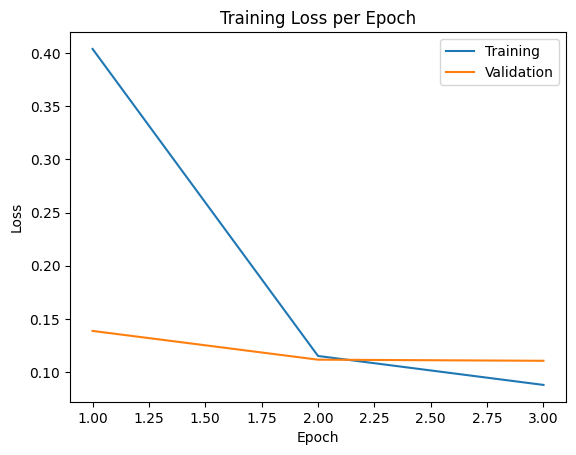

In [ ]:
# Add your code HERE
#1.

# getting evaluation metrics
log_history = pd.DataFrame(trainer.state.log_history)
loss = log_history['loss'].dropna().reset_index(drop=True)
eval_df = log_history[['epoch', 'eval_loss', 'eval_accuracy', 'eval_f1']].dropna().rename(columns={'eval_loss': 'Validation loss', 'eval_accuracy': 'Accuracy', 'eval_f1': 'F1 Score'}).reset_index(drop=True)

eval_df = pd.concat([eval_df,loss], axis=1).rename(columns={'loss': 'Training loss'})
display(eval_df)

# plotting training loss
plt.plot(eval_df['epoch'], eval_df['Training loss'],label = 'Training')
plt.plot(eval_df['epoch'], eval_df['Validation loss'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()
plt.show()


 discuss your interpretation of the learning curve

 **ANS**
At the first epoch, the model was underfitting since both training and validation loss was high. By the second epoch the model had an adequate fit, and by the third epoch, the model was overfitting since the validation loss was high but the training loss was low.


In [ ]:
#2.

pred = trainer.predict(validation)
pred_labels = np.argmax(pred.predictions,axis = 1)


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1463
           1       0.97      0.94      0.95      1741
           2       0.81      0.89      0.85       415
           3       0.92      0.93      0.93       634
           4       0.89      0.92      0.90       561
           5       0.83      0.84      0.84       185

    accuracy                           0.94      4999
   macro avg       0.90      0.92      0.91      4999
weighted avg       0.94      0.94      0.94      4999



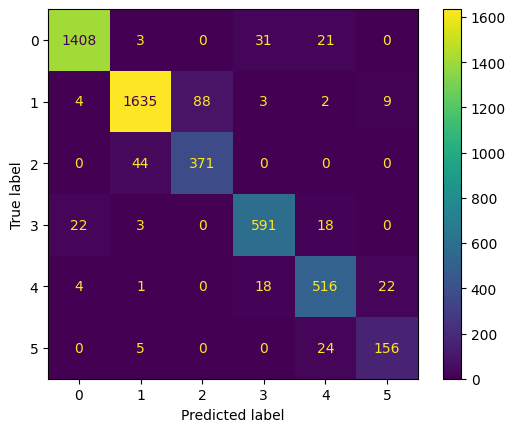

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(validation_labels, pred_labels, labels= numerics))

cm = confusion_matrix(validation_labels, pred_labels,labels = numerics)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Discuss your interpretation of the results

 **ANS**

From the classification report it seems that the model was able to classify all 6 emotions will relatively good precision/recall. However class 2 and class 5 seems to have the worst evaluation metrics.This is most likely due to the fact that class 2 and class 5 are underepresented in the data, and therefore the model is more likely to misclassify instances of these classes.

From the confusion matrix, it seems that most tweets were mainly class "0" or class "1", and the model had relatviely no issue classifying between class "0" and class "1". Additionally, the model seemed to struggle the most with classifying tweets between class "1" or class "2". This may have been because of the fact that class "1" represents tweets that express joy and class "2" represents tweets that express love, hence since these emotions are similar, it could be difficult for the model to semantically differentiation written expressions for these 2 emotions.


 ## Part 5: Performance on a Test Set (Optional) - BONUS!
 ### [10 Marks]

 * The code below saves the trained model configuration and tokenizer using `save_pretrained()`, and reports the largest file and the size of it. What do you think this file represents? **[2 Marks]**

 * Use the trained methods to make model predictions on the two new unseen Twitter messages given below and report the final category predicted by the model for the two cases:

    * "Don't ever express your feelings. They'll only be used against you"
    * "The toys R us advert makes me want to scream."

  **Hint:** Tokenize the sentence using the model's tokenizer, convert it into a dataset format that the model can understand, and then fed into the model for prediction. The predicted emotion is obtained by taking the argmax of the model's prediction, which gives the index of the highest scoring class, and mapping this back to the corresponding label.

  **[8 Marks]**


In [ ]:
import os
output_dir = './model_save/'
# Create output directory
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
print("Saving model to %s" % output_dir)
# Save a trained model, configuration and tokenizer using `save_pretrained()`
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

In [ ]:
!ls -l --block-size=K ./model_save/

In [ ]:
!ls -l --block-size=M ./model_save/model.safetensors

In [ ]:
# Add your code HERE

In [ ]:
%%shell
jupyter nbconvert --to html "/content/F24_MIE370_Project_4 (1).ipynb"

[NbConvertApp] Converting notebook /content/F24_MIE370_Project_4 (1).ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 982388 bytes to /content/F24_MIE370_Project_4 (1).html
